# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA

# Load Dataset

In [ ]:
data=pd.read_excel('/content/daily_offers.xlsx')

# Basic Info About Dataset

In [ ]:
#Examining the shape of data
data.shape

(181673, 14)

In [ ]:
#Examining the first 10 rows of data
data.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00


In [ ]:
#examining the data types of all the features present in the dataset
data.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [ ]:
# Examining the number of unique values in the features from the dataset.
data.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [ ]:
# Examining the sum of all the null values present in the dataset
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
# Dropping some columns because they do not give any usefull information
data.drop(['id','item_date','delivery date','material_ref'],axis=1,inplace=True)

In [ ]:
# Examining the Shape of dataset
data.shape

(181673, 10)

In [ ]:
data.dropna(inplace=True)
prd_freq=data.product_ref.value_counts(normalize=True)
data['product_ref'] = data['product_ref'].map(prd_freq)
data.country.unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [ ]:
country_freq=data.country.value_counts(normalize=True)
data['country'] = data['country'].map(country_freq)
data.shape

(181640, 10)

In [ ]:
#Taking a look at the top 5 rows in the dataset
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,0.087117,Won,W,10.0,2.00,1500.0,0.104135,854.00
1,768.024839,30202938.0,0.128612,Won,W,41.0,0.80,1210.0,0.084139,1047.00
2,386.127949,30153963.0,0.047908,Won,WI,28.0,0.38,952.0,0.102252,644.33
3,202.411065,30349574.0,0.102720,Won,S,59.0,2.30,1317.0,0.084139,768.00
4,785.526262,30211560.0,0.087117,Won,W,10.0,4.00,2000.0,0.150699,577.00


In [ ]:
# Taking a look at the unique values present in the Item Type column
data['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
item_freq = data['item type'].value_counts(normalize=True)
data['item type'] = data['item type'].map(item_freq)
cust_freq=data.customer.value_counts(normalize=True)
data['customer'] = data['customer'].map(cust_freq)
status_freq=data.status.value_counts(normalize=True)
data['status'] = data['status'].map(status_freq)
data.shape

(181640, 10)

In [ ]:
# Taking a look at all the statistical information in the dataset
data.describe()

,customer,country,status,item type,application,thickness,width,product_ref,selling_price
count,181640.000000,181640.000000,181640.000000,181640.000000,181640.000000,181640.000000,181640.000000,181640.000000,1.816400e+05
mean,0.005551,0.113815,0.456824,0.484222,25.616114,2.564133,1295.263477,0.144066,1.918316e+03
std,0.006127,0.046809,0.244795,0.132023,17.754161,6.572484,261.641285,0.074728,3.318249e+05
min,0.000006,0.000028,0.000006,0.000006,2.000000,0.180000,1.000000,0.000006,-1.160000e+03
25%,0.001162,0.087117,0.189567,0.381012,10.000000,0.700000,1180.000000,0.102252,6.690000e+02
50%,0.003083,0.118416,0.638675,0.581430,15.000000,1.500000,1250.000000,0.150699,8.120000e+02
75%,0.008484,0.151486,0.638675,0.581430,41.000000,3.000000,1500.000000,0.251729,9.530000e+02
max,0.027461,0.176635,0.638675,0.581430,99.000000,2500.000000,2990.000000,0.251729,1.000010e+08


In [ ]:
# Examining the first 5 rows of Dataset
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,0.010565,0.087117,0.638675,0.581430,10.0,2.00,1500.0,0.104135,854.00
1,768.024839,0.014149,0.128612,0.638675,0.581430,41.0,0.80,1210.0,0.084139,1047.00
2,386.127949,0.000220,0.047908,0.638675,0.002885,28.0,0.38,952.0,0.102252,644.33
3,202.411065,0.000721,0.102720,0.638675,0.381012,59.0,2.30,1317.0,0.084139,768.00
4,785.526262,0.003215,0.087117,0.638675,0.581430,10.0,4.00,2000.0,0.150699,577.00


In [ ]:
data_drop=data[data['quantity tons']=='e']
data_drop.index

Int64Index([173086], dtype='int64')

In [ ]:
# Dropping the index column
data=data.drop(data_drop.index,axis=0)
data['quantity tons']=data['quantity tons'].astype(float)
data.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
count,1.816390e+05,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,1.816390e+05
mean,5.875974e+03,0.005551,0.113814,0.456823,0.484221,25.616030,2.564145,1295.265103,0.144066,1.918323e+03
std,2.349295e+06,0.006127,0.046809,0.244795,0.132023,17.754173,6.572500,261.641088,0.074729,3.318258e+05
min,-2.000000e+03,0.000006,0.000028,0.000006,0.000006,2.000000,0.180000,1.000000,0.000006,-1.160000e+03
25%,1.096869e+01,0.001162,0.087117,0.189567,0.381012,10.000000,0.700000,1180.000000,0.102252,6.690000e+02
50%,3.036395e+01,0.003083,0.118416,0.638675,0.581430,15.000000,1.500000,1250.000000,0.150699,8.120000e+02
75%,6.716187e+01,0.008484,0.151486,0.638675,0.581430,41.000000,3.000000,1500.000000,0.251729,9.530000e+02
max,1.000000e+09,0.027461,0.176635,0.638675,0.581430,99.000000,2500.000000,2990.000000,0.251729,1.000010e+08


In [ ]:
# Examining all the null values present in the dataset
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [ ]:
#Examining the shape of data again
data.shape

(181639, 10)

In [ ]:
# Filling all the null values with the median values
data.application=data.application.fillna(data.application.median())

In [ ]:
# Rechecking the values after Removing all the null values.
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [ ]:
# Taking a look at the top 5 rows after making changes in the table
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,0.010565,0.087117,0.638675,0.581430,10.0,2.00,1500.0,0.104135,854.00
1,768.024839,0.014149,0.128612,0.638675,0.581430,41.0,0.80,1210.0,0.084139,1047.00
2,386.127949,0.000220,0.047908,0.638675,0.002885,28.0,0.38,952.0,0.102252,644.33
3,202.411065,0.000721,0.102720,0.638675,0.381012,59.0,2.30,1317.0,0.084139,768.00
4,785.526262,0.003215,0.087117,0.638675,0.581430,10.0,4.00,2000.0,0.150699,577.00


In [ ]:
# Taking a look at all the statistical measures in the dataset after making required changes
data.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
count,1.816390e+05,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,181639.000000,1.816390e+05
mean,5.875974e+03,0.005551,0.113814,0.456823,0.484221,25.616030,2.564145,1295.265103,0.144066,1.918323e+03
std,2.349295e+06,0.006127,0.046809,0.244795,0.132023,17.754173,6.572500,261.641088,0.074729,3.318258e+05
min,-2.000000e+03,0.000006,0.000028,0.000006,0.000006,2.000000,0.180000,1.000000,0.000006,-1.160000e+03
25%,1.096869e+01,0.001162,0.087117,0.189567,0.381012,10.000000,0.700000,1180.000000,0.102252,6.690000e+02
50%,3.036395e+01,0.003083,0.118416,0.638675,0.581430,15.000000,1.500000,1250.000000,0.150699,8.120000e+02
75%,6.716187e+01,0.008484,0.151486,0.638675,0.581430,41.000000,3.000000,1500.000000,0.251729,9.530000e+02
max,1.000000e+09,0.027461,0.176635,0.638675,0.581430,99.000000,2500.000000,2990.000000,0.251729,1.000010e+08


In [ ]:
# Taking a look at the last rows of the dataset.
data.tail()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
181668,102.482422,0.010708,0.128612,0.638675,0.58143,41.0,0.96,1220.0,0.158467,591.0
181669,208.086469,0.010708,0.128612,0.638675,0.58143,41.0,0.95,1500.0,0.158467,589.0
181670,4.235594,0.010708,0.128612,0.638675,0.58143,41.0,0.71,1250.0,0.158467,619.0
181671,-2000.000000,0.010708,0.128612,0.638675,0.58143,41.0,0.85,1250.0,0.158467,601.0
181672,406.686538,0.010708,0.128612,0.638675,0.58143,41.0,0.71,1240.0,0.158467,607.0


# EDA

Performing the EDA on the given dataset by using many different visualisation like, Bar graph, Heatmaps, box plots and scatter plots

<Axes: >

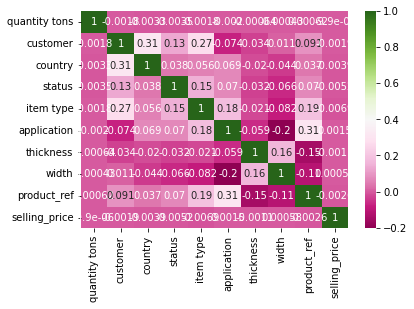

In [ ]:
# Heatmap which shows the correlation between the dataset
sns.heatmap(data.corr(), annot=True,cmap='PiYG')

<Axes: xlabel='item type', ylabel='country'>

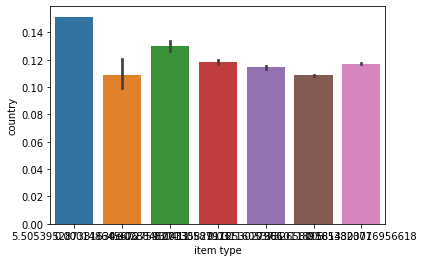

In [ ]:
# Bargraph between the Country and Item Type column
sns.barplot(y='country',x='item type',data=data)

<Axes: xlabel='status', ylabel='selling_price'>

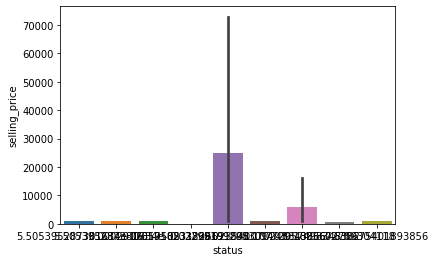

In [ ]:
# Bargraph between selling price and the status feature from the dataset
sns.barplot(y='selling_price',x='status',data=data)

<Axes: xlabel='item type', ylabel='quantity tons'>

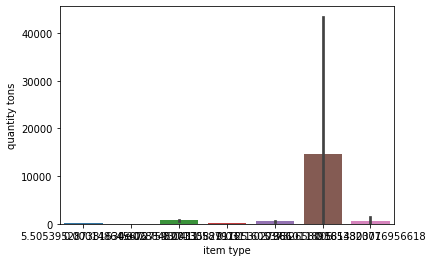

In [ ]:
# Bargraph between quantity tons and the item type feature from the dataset
sns.barplot(y='quantity tons',x='item type',data=data)

<Axes: xlabel='item type', ylabel='selling_price'>

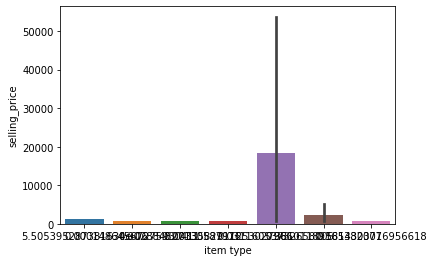

In [ ]:
# Bargraph between selling price and the item type feature from the dataset
sns.barplot(y='selling_price',x='item type',data=data)

<Axes: >

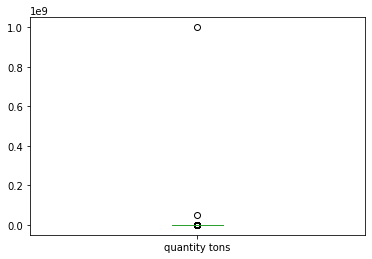

In [ ]:
data['quantity tons'].plot.box()

In [ ]:
data['quantity tons'].max()

1000000000.0

In [ ]:
x_value=data['quantity tons'].quantile(0.99)
x_value

1124.3470587415227

<Axes: >

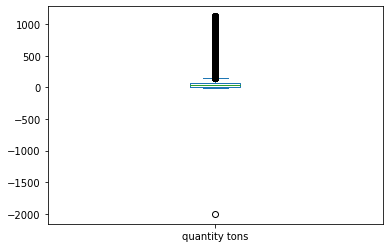

In [ ]:
data=data[data['quantity tons']<x_value]
data['quantity tons'].plot.box()

<Axes: >

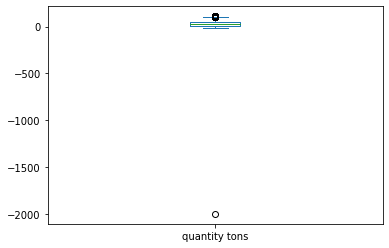

In [ ]:
data=data[data['quantity tons']<110]
data['quantity tons'].plot.box()

<Axes: >

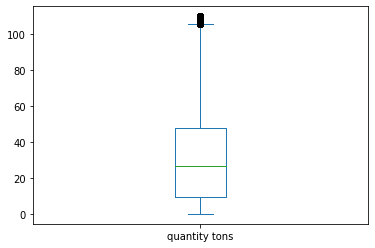

In [ ]:
data=data[data['quantity tons']>0]
data['quantity tons'].plot.box()

<Axes: >

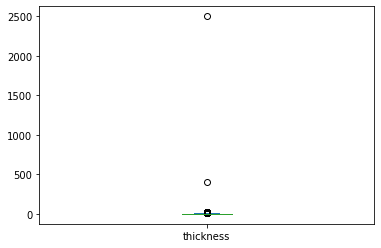

In [ ]:
data.thickness.plot.box()

In [ ]:
data.thickness.max()

2500.0

In [ ]:
x2_value=data.thickness.quantile(0.99)
x2_value

14.99

<Axes: >

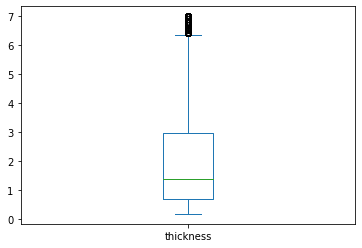

In [ ]:
data=data[data.thickness<7]
data.thickness.plot.box()

<Axes: >

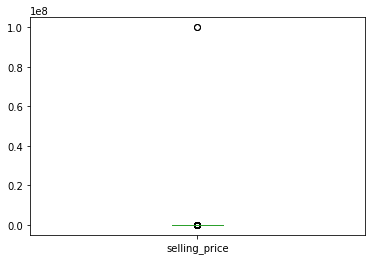

In [ ]:
data['selling_price'].plot.box()

In [ ]:
data['selling_price'].max()


1379.65

In [ ]:
data.selling_price.quantile(0.99)

1307.0

<Axes: >

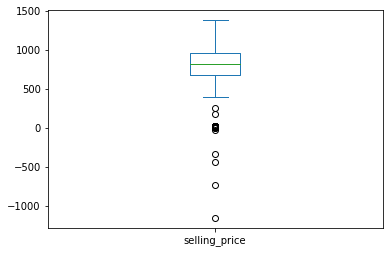

In [ ]:
data=data[data['selling_price']<1380]
data['selling_price'].plot.box()

<Axes: >

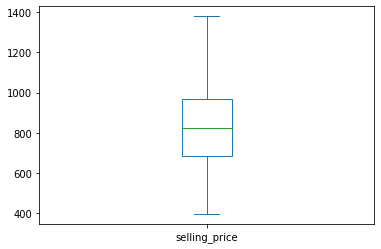

In [ ]:
data=data[data['selling_price']>250]
data['selling_price'].plot.box()

<Axes: >

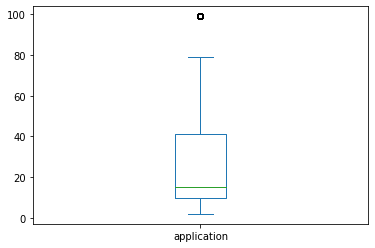

In [ ]:
data.application.plot.box()

<Axes: >

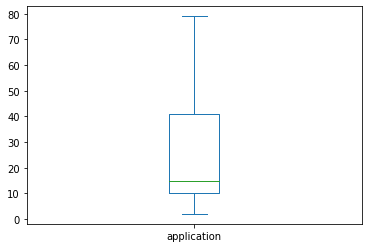

In [ ]:
data=data[data['application']<80]
data.application.plot.box()

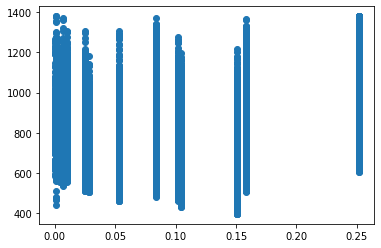

In [ ]:
# Scatter plot between Product ref and selling price
plt.scatter(x=data['product_ref'],y=data['selling_price'])

# Choosing Model

In [ ]:
# Taking a look at the shape of Data
data.shape

(138704, 10)

In [ ]:
#Taking a look at the top 5 rows in the dataset
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,0.010565,0.087117,0.638675,0.581430,10.0,2.00,1500.0,0.104135,854.0
8,69.071853,0.001806,0.009425,0.638675,0.381012,10.0,0.60,1275.0,0.006695,1363.0
12,27.512545,0.015019,0.176635,0.638675,0.581430,10.0,0.75,1250.0,0.158467,1098.0
13,32.235317,0.002676,0.118416,0.638675,0.381012,10.0,0.60,1010.0,0.102252,973.0
14,10.411350,0.001723,0.087117,0.022952,0.581430,10.0,0.60,1250.0,0.251729,1258.0


In [ ]:
# Copying the data to a ne variable
data_copy=data.copy()

In [ ]:
# Seeing the data in the new variable
data_copy

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,0.010565,0.087117,0.638675,0.581430,10.0,2.00,1500.0,0.104135,854.0
8,69.071853,0.001806,0.009425,0.638675,0.381012,10.0,0.60,1275.0,0.006695,1363.0
12,27.512545,0.015019,0.176635,0.638675,0.581430,10.0,0.75,1250.0,0.158467,1098.0
13,32.235317,0.002676,0.118416,0.638675,0.381012,10.0,0.60,1010.0,0.102252,973.0
14,10.411350,0.001723,0.087117,0.022952,0.581430,10.0,0.60,1250.0,0.251729,1258.0
...,...,...,...,...,...,...,...,...,...,...
181665,6.169226,0.010708,0.128612,0.638675,0.581430,41.0,0.71,1300.0,0.158467,608.0
181666,82.123794,0.010708,0.128612,0.638675,0.581430,41.0,1.18,1220.0,0.158467,590.0
181667,106.783299,0.010708,0.128612,0.638675,0.581430,41.0,0.96,1240.0,0.158467,602.0
181668,102.482422,0.010708,0.128612,0.638675,0.581430,41.0,0.96,1220.0,0.158467,591.0


In [ ]:
y=data.pop('selling_price')
X=data

In [ ]:
# spiliting the data into test and train df

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, test_size = 0.1, random_state = 100)

In [ ]:
# Seeing the shape of the Train and test dataset
print(X_train.shape)
print(X_test.shape)

(124833, 9)
(13871, 9)


In [ ]:
# Seeing all the statistical information about the Train dataset from the major dataset
col=X_test.columns
X_train.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
count,124833.000000,124833.000000,124833.000000,124833.000000,124833.000000,124833.000000,124833.000000,124833.000000,124833.000000
mean,32.632675,0.005984,0.113140,0.472383,0.495293,25.219573,1.927098,1279.060580,0.147237
std,27.783091,0.006360,0.046716,0.237717,0.120205,17.425144,1.546896,250.092451,0.076492
min,0.000010,0.000006,0.000028,0.000055,0.000149,2.000000,0.180000,1.000000,0.000006
25%,9.347463,0.001266,0.087117,0.189567,0.381012,10.000000,0.700000,1164.000000,0.102252
50%,26.996437,0.003303,0.118416,0.638675,0.581430,15.000000,1.500000,1250.000000,0.150699
75%,48.869634,0.009403,0.151486,0.638675,0.581430,41.000000,3.000000,1465.000000,0.251729
max,109.997896,0.027461,0.176635,0.638675,0.581430,79.000000,6.990000,2990.000000,0.251729


In [145]:
# Implementing the scaler and seeing the Statistical information abou the Train data
scaler= StandardScaler()
X_train[col]=scaler.fit_transform(X_train[col])
X_train.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
count,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05,1.248330e+05
mean,-9.534010e-18,4.086817e-17,1.710430e-17,-9.733228e-18,9.239452e-17,-7.114933e-18,-1.499828e-17,1.764503e-18,-4.305957e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.174556e+00,-9.400222e-01,-2.421277e+00,-1.986943e+00,-4.119176e+00,-1.332538e+00,-1.129426e+00,-5.110373e+00,-1.924811e+00
25%,-8.381107e-01,-7.417940e-01,-5.570430e-01,-1.189722e+00,-9.507176e-01,-8.734295e-01,-7.932678e-01,-4.600740e-01,-5.881123e-01
50%,-2.028666e-01,-4.215126e-01,1.129217e-01,6.995411e-01,7.165932e-01,-5.864867e-01,-2.761011e-01,-1.161998e-01,4.525777e-02
75%,5.844211e-01,5.376004e-01,8.208332e-01,6.995411e-01,7.165932e-01,9.056161e-01,6.935865e-01,7.434857e-01,1.366050e+00
max,2.784626e+00,3.376852e+00,1.359162e+00,6.995411e-01,7.165932e-01,3.086382e+00,3.272955e+00,6.841255e+00,1.366050e+00


In [ ]:
# Seeing the statistical information about the Test Data
X_test.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000
mean,32.263056,0.006022,0.113541,0.473767,0.493976,24.898277,1.931765,1282.697729,0.146391
std,27.446196,0.006359,0.046931,0.236766,0.120726,17.356123,1.547410,250.555566,0.076723
min,0.005323,0.000011,0.000506,0.000006,0.000149,2.000000,0.200000,54.000000,0.000066
25%,9.362949,0.001288,0.087117,0.189567,0.381012,10.000000,0.700000,1172.000000,0.102252
50%,26.798315,0.003309,0.118416,0.638675,0.581430,15.000000,1.500000,1250.000000,0.150699
75%,48.501160,0.009458,0.151486,0.638675,0.581430,41.000000,2.995000,1490.000000,0.251729
max,109.985309,0.027461,0.176635,0.638675,0.581430,79.000000,6.990000,2150.000000,0.251729


In [ ]:
# Scaling the test data and then seeing the Statistical information about the Test data to identify the changes
X_test[col]=scaler.transform(X_test[col])
X_test.describe()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000
mean,-0.013304,0.005986,0.008573,0.005821,-0.010952,-0.018439,0.003017,0.014543,-0.011066
std,0.987878,0.999916,1.004603,0.996003,1.004341,0.996043,1.000336,1.001856,1.003020
min,-1.174365,-0.939157,-2.411024,-1.987151,-4.119176,-1.332538,-1.116497,-4.898450,-1.924019
25%,-0.837553,-0.738331,-0.557043,-1.189722,-0.950718,-0.873429,-0.793268,-0.428086,-0.588112
50%,-0.209998,-0.420647,0.112922,0.699541,0.716593,-0.586487,-0.276101,-0.116200,0.045258
75%,0.571158,0.546257,0.820833,0.699541,0.716593,0.905616,0.690354,0.843449,1.366050
max,2.784173,3.376852,1.359162,0.699541,0.716593,3.086382,3.272955,3.482484,1.366050


# Using Linear Regression

In [ ]:
# Adding a constant variable and Running the linear regression model and seeing the results
X_train_lm = sm.add_constant(X_train)
lm1 = sm.OLS(y_train,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4955.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:37:44   Log-Likelihood:            -8.1305e+05
No. Observations:              124833   AIC:                         1.626e+06
Df Residuals:                  124823   BIC:                         1.626e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           836.9975      0.462   1813.512

In [ ]:
# Seeing the VIF
X_train_new=X_train
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,thickness,1.38
8,product_ref,1.37
1,customer,1.29
4,item type,1.22
5,application,1.20
7,width,1.18
2,country,1.14
0,quantity tons,1.10
3,status,1.07


<Axes: ylabel='Density'>

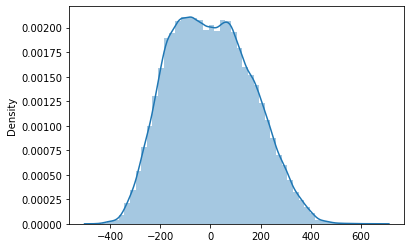

In [ ]:
#Taking a look at the Displot
y_train_pred=lm1.predict(X_train_lm)
res=y_train-y_train_pred
sns.distplot(res)

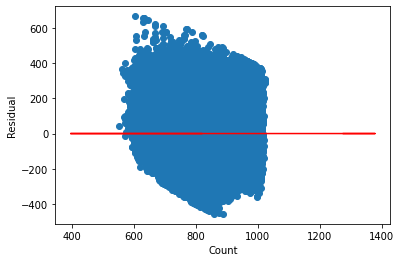

In [ ]:
# Seeing a scatter and a plot between Count and Residual
res = y_train - y_train_pred
plt.scatter(y_train_pred, res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

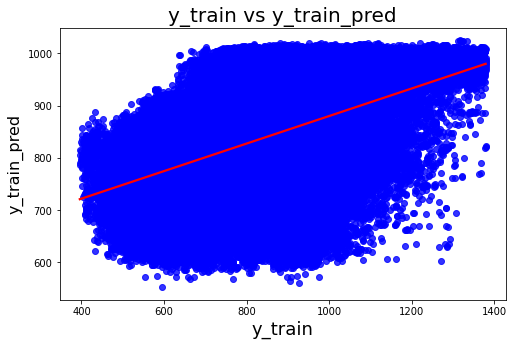

In [ ]:
# Seeing a Regplot between Y train and Y train pred
plt.figure(figsize=(8,5))
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)             
plt.xlabel('y_train', fontsize=18)                        
plt.ylabel('y_train_pred', fontsize=16)                        
plt.show()

In [ ]:
# Seeing the head of the data_copy after changes
data_copy.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,0.010565,0.087117,0.638675,0.581430,10.0,2.00,1500.0,0.104135,854.0
8,69.071853,0.001806,0.009425,0.638675,0.381012,10.0,0.60,1275.0,0.006695,1363.0
12,27.512545,0.015019,0.176635,0.638675,0.581430,10.0,0.75,1250.0,0.158467,1098.0
13,32.235317,0.002676,0.118416,0.638675,0.381012,10.0,0.60,1010.0,0.102252,973.0
14,10.411350,0.001723,0.087117,0.022952,0.581430,10.0,0.60,1250.0,0.251729,1258.0


In [147]:
# Define the sample size and Perform random sampling
sample_size = 5000
sampled_data = data_copy.sample(n=sample_size, replace=False, random_state=42)
sampled_data.shape

(5000, 10)

In [ ]:
# Dividing the data into Train and test. Then scaling the test data and adding a constant variable
y=sampled_data.pop('selling_price')
X=sampled_data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X,y, train_size = 0.9, test_size = 0.1, random_state = 100)
X_train_new[col]=scaler.fit_transform(X_train_new[col])
X_test_new[col]=scaler.transform(X_test_new[col])
X_train_lm = sm.add_constant(X_train_new)

In [ ]:
# Running a linear regression model and seeing the results
lm1_new = sm.OLS(y_train_new,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     4955.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:40:04   Log-Likelihood:            -8.1305e+05
No. Observations:              124833   AIC:                         1.626e+06
Df Residuals:                  124823   BIC:                         1.626e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           836.9975      0.462   1813.512

In [ ]:
# Seeing the VIF
X_train_new=X_train_new
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,thickness,1.37
8,product_ref,1.35
1,customer,1.26
4,item type,1.21
5,application,1.21
7,width,1.18
2,country,1.13
0,quantity tons,1.11
3,status,1.06


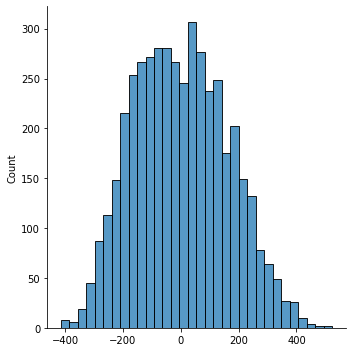

In [ ]:
# Seeing the Displot
y_train_pred=lm1_new.predict(X_train_lm)
res=y_train_new-y_train_pred
sns.displot(res)

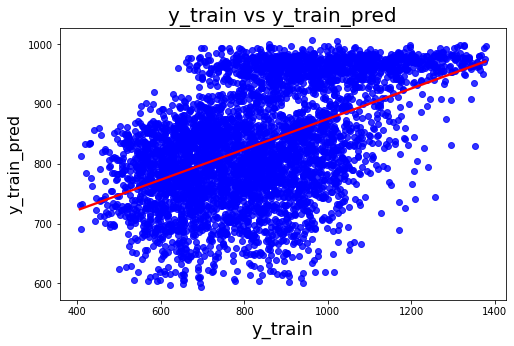

In [ ]:
# Seeing the plot between Ytrain and Y train_pred
plt.figure(figsize=(8,5))
sns.regplot(x=y_train_new, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_train vs y_train_pred', fontsize=20)             
plt.xlabel('y_train', fontsize=18)                        
plt.ylabel('y_train_pred', fontsize=16)                        
plt.show()

# Using Random Forest

In [ ]:
rf=RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
# Seeing the new shape of X train data
X_train_new.shape

(4500, 9)

In [ ]:
# Running the regressor
rf.fit(X_train_new,y_train_new)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_train_pred=rf.predict(X_train_new)
y_test_pred=rf.predict(X_test_new)

In [ ]:
# Seeing the r2 score
print(r2_score(y_train_new,y_train_pred))
print(r2_score(y_test_new,y_test_pred))

0.9238352233911499
0.39715284752210733


In [ ]:
# Fitting the Random forest regressor
rf=RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

In [ ]:
# Seeing the new R2 score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9507962630329629
0.6513199309918147


In [ ]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
params = {
    "max_depth": [16,17],
    "max_features": [8,9,10],
    "min_samples_leaf": [5,6],
    'n_estimators': [19,20]
}

In [150]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
CPU times: user 14.3 s, sys: 1.53 s, total: 15.9 s
Wall time: 8min 57s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [16, 17], 'max_features': [8, 9, 10],
                         'min_samples_leaf': [5, 6], 'n_estimators': [19, 20]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_score_

0.6341090736172117

In [ ]:
rf_best = grid_search.best_estimator_

In [ ]:
rf_best

RandomForestRegressor(max_depth=17, max_features=8, min_samples_leaf=5,
                      n_estimators=20, n_jobs=-1, random_state=42)

In [151]:
# Seeing the R2 Score
y_train_pred=rf_best.predict(X_train)
y_test_pred=rf_best.predict(X_test)
r2_score(y_train,y_train_pred)

0.7389826889096491

In [ ]:
r2_score(y_test,y_test_pred)

0.6481412242066729

# Boosting

In [ ]:
# Boosting using Adaboost
xgb_reg = xgb.XGBRegressor(n_jobs=-1)

In [ ]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)

In [ ]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6266116808734128
0.5991270144730343


In [ ]:
adaboost= AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential')
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)
r2score = r2_score(y_test,y_pred)

In [ ]:
r2score

0.37228224799157483

# Principal Component Analysis

In [ ]:
# Instantiate PCA
pca = PCA(random_state=42)

In [ ]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
# Principal components
pca.components_

array([[ 0.23286186, -0.30448561, -0.23078772, -0.27170858, -0.40162528,
        -0.3313311 ,  0.41359875,  0.30800995, -0.43469313],
       [ 0.35721104, -0.50913108, -0.31299797, -0.20947419, -0.26092676,
         0.33350714, -0.35286654, -0.28292061,  0.29575325],
       [ 0.41145491,  0.30103827,  0.6821921 , -0.36203338, -0.32020677,
        -0.0610336 , -0.18723667, -0.04791883,  0.00391423],
       [ 0.37272055, -0.02938444,  0.11381693,  0.11036056,  0.19152633,
         0.49988531,  0.3348724 ,  0.59990924,  0.27655726],
       [ 0.26145329, -0.14185977,  0.22443021,  0.52721568, -0.05526435,
         0.29300557,  0.25176306, -0.46021123, -0.46808895],
       [-0.30495406, -0.13496581,  0.14668066, -0.6553746 ,  0.31080975,
         0.39021206,  0.31182535, -0.23468849, -0.19124405],
       [-0.5881546 , -0.26521355,  0.31772411,  0.16121006, -0.59215804,
         0.23282593,  0.01748391,  0.19110084,  0.12294054],
       [-0.0333285 ,  0.66726912, -0.44430042, -0.07319441, -0

In [ ]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.22614453 0.39437655 0.51150697 0.61898863 0.71934107 0.81276207
 0.89060833 0.95012483 1.        ]


Text(0, 0.5, 'Cumulative Variance')

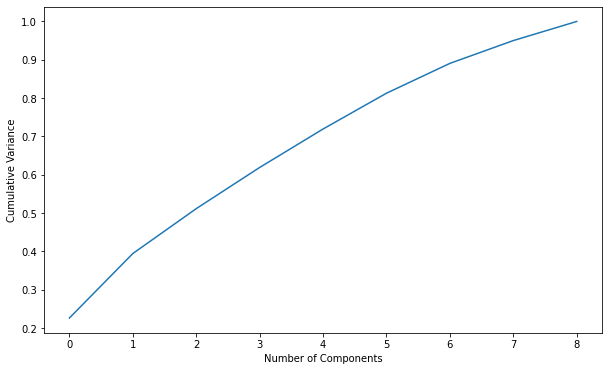

In [ ]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

In [152]:
# Seeing the shape of Xtrain_pca
pca_d=PCA(0.9)
X_train_pca=pca_d.fit_transform(X_train)
X_train_pca.shape

(124833, 8)

In [ ]:
X_test_pca=pca_d.transform(X_test)
X_test_pca.shape
rf_pca = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_pca.fit(X_train_pca,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_train_pred=rf_pca.predict(X_train_pca)
y_test_pred=rf_pca.predict(X_test_pca)

In [ ]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9373227113797915
0.5487209288949113
